In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from IPython import display
import time
import warnings

warnings.filterwarnings("ignore")

# Temporal Development of Various Crime Features

Among the selected datasets in {numref}`sec:data-selection`, the *Kriminalitätsatlas* stood out as the one with the highest usability.
It provides about 20 relevant features. The dataset was divided into subsets for each year from 2013 to 2022. The data had been reconfigured to fit the newly introduced LOR divisions, which made it easily usable for our purpose.

## Overall Crime

KeyboardInterrupt: 

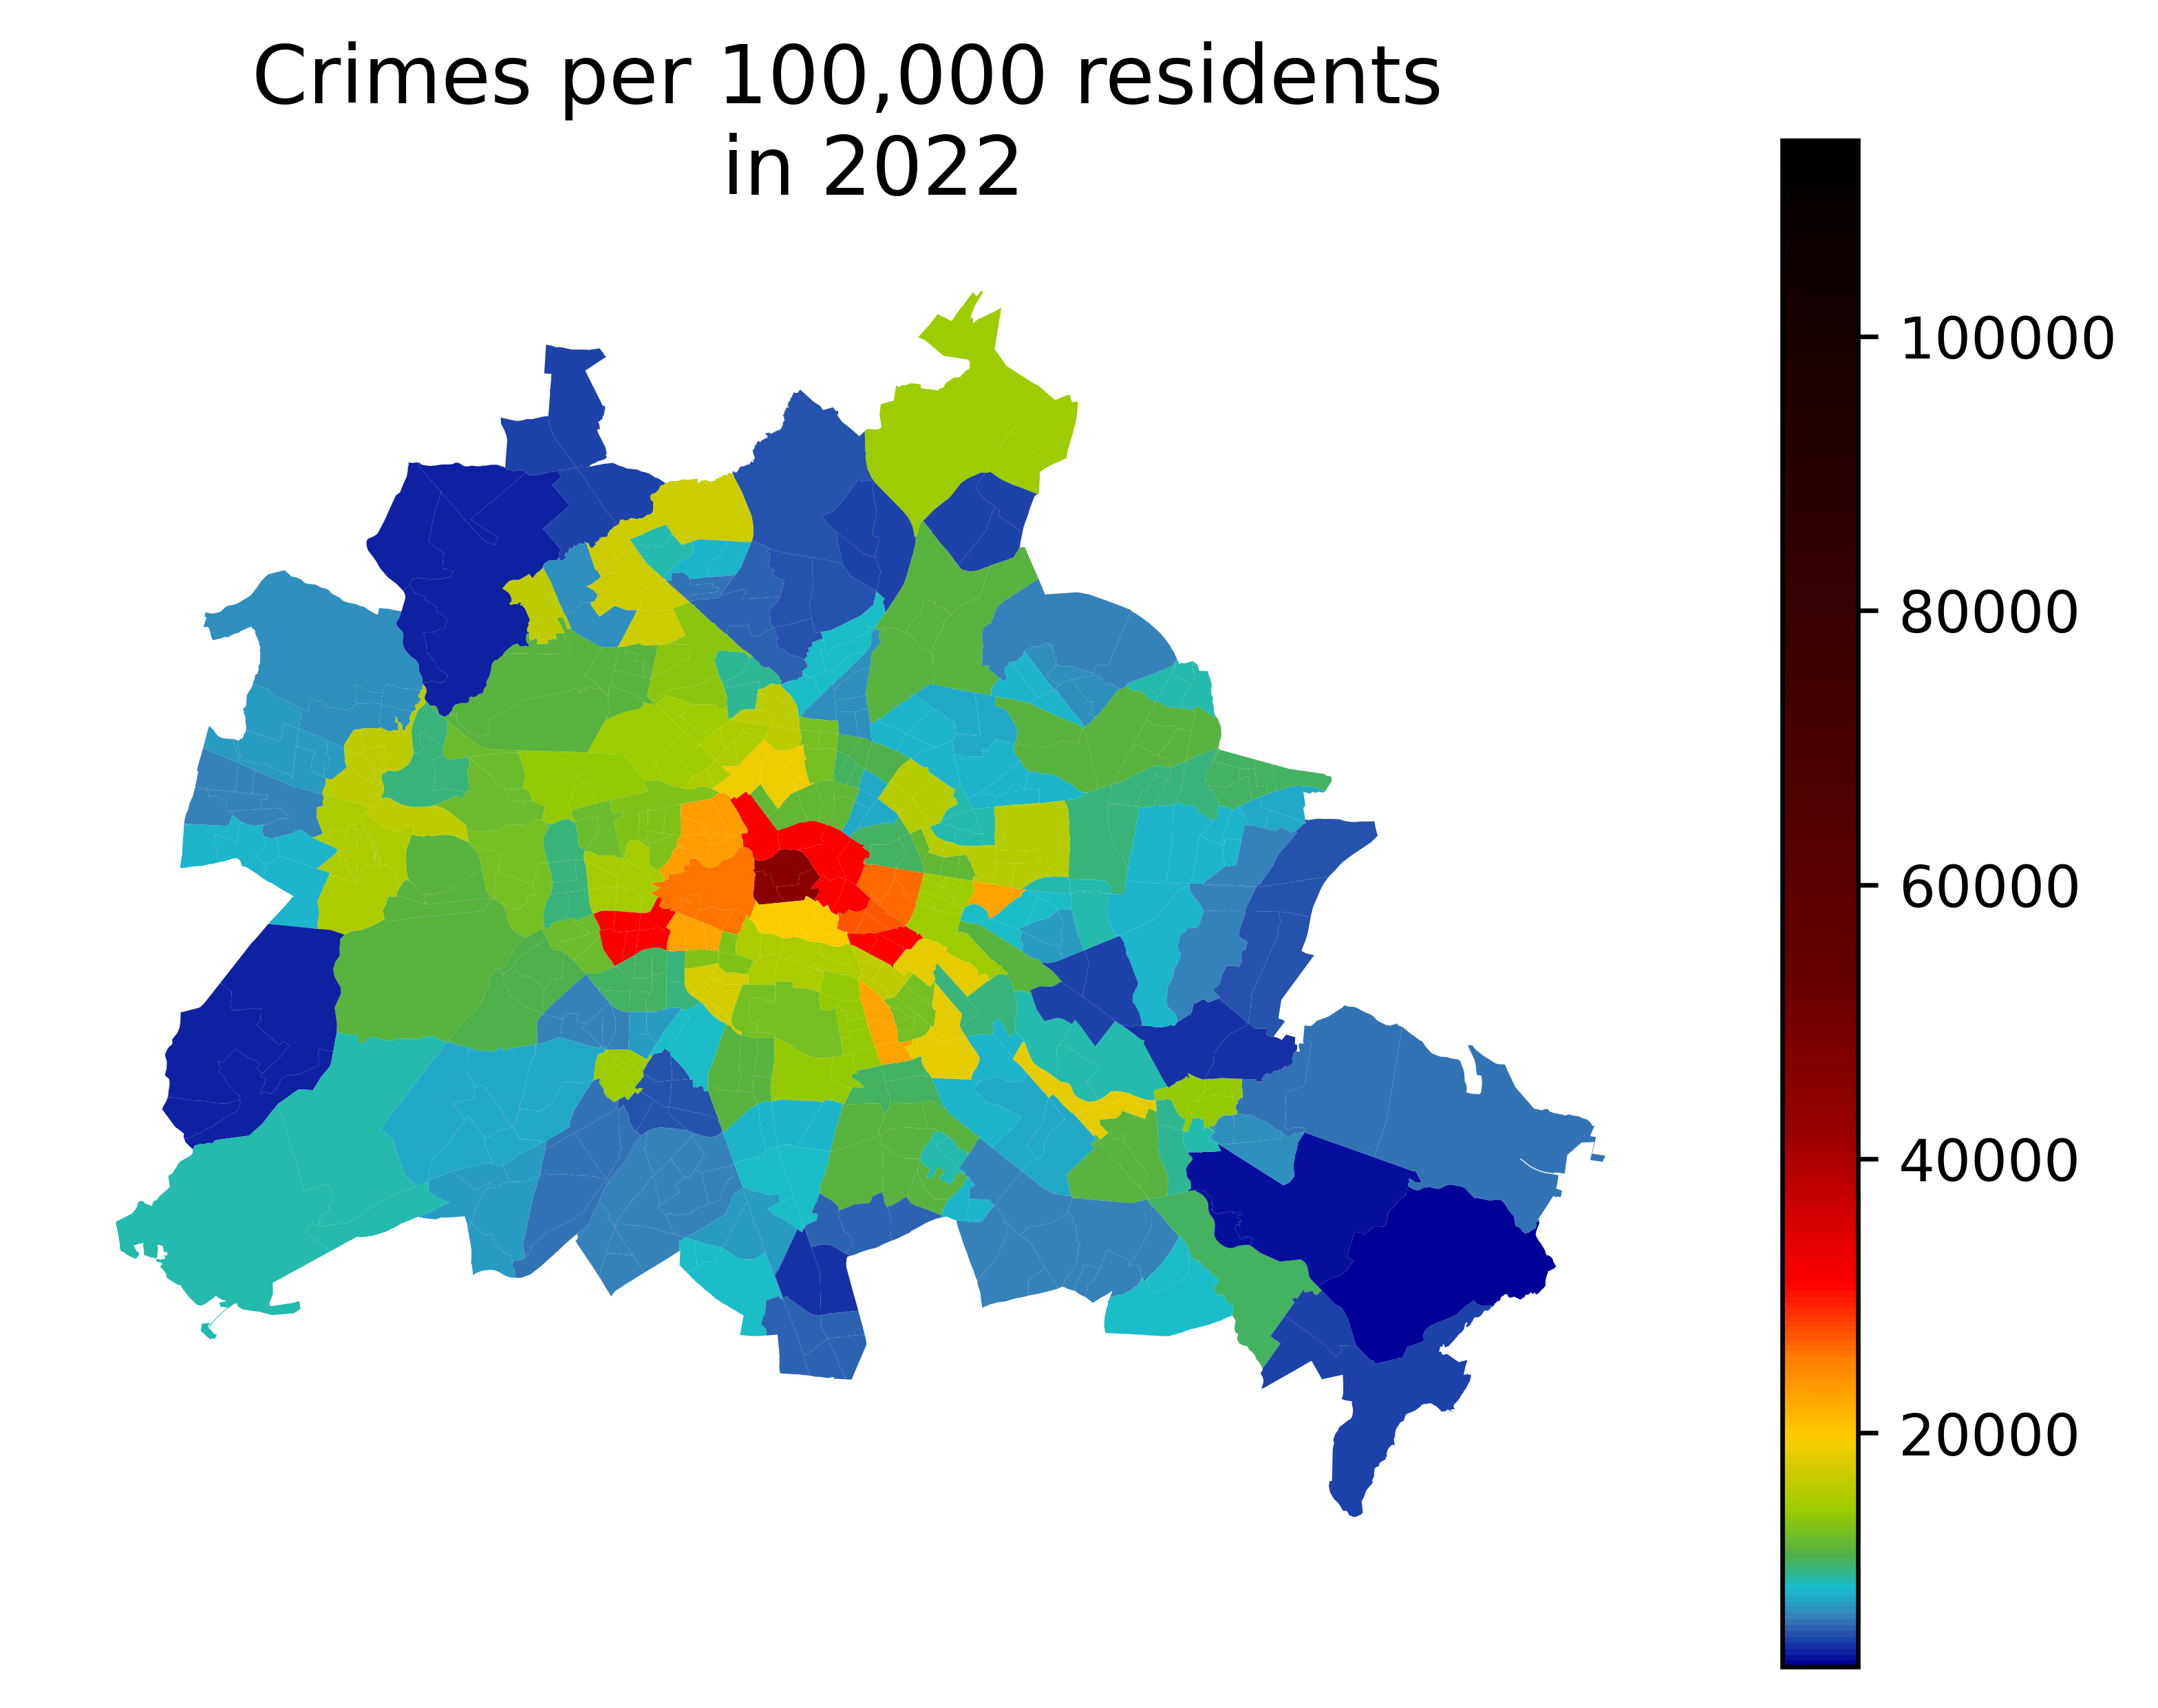

In [2]:
tab10 = sns.color_palette("tab10")
set1 = sns.color_palette("Set1")
colors = ["#000099", set1[1], tab10[9], set1[2], "#99cc00", "#ffcc00", set1[4], "#ff0000", "#cc0000", "#990000", "#660000", "#000000"]
positions = [0.0, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.45, 1.0]
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', list(zip(positions, colors)))
custom_cmap

crime_dev = pd.read_pickle("../data/05_kriminalitaet_2013_bis_2022_hz.pkl")

crime_dev["Straftaten \n-insgesamt-"] = crime_dev["Straftaten \n-insgesamt-"].astype(int)

max_value = max(crime_dev["Straftaten \n-insgesamt-"])
min_value = min(crime_dev["Straftaten \n-insgesamt-"])
vmin, vmax = min_value, max_value

for year in range(2013, 2023):
    year_df = crime_dev[crime_dev['Year'] == year]
    
    straftaten_gesamt_df = year_df[["PLR_NAME", "geometry", "Straftaten \n-insgesamt-"]]
    straftaten_gesamt_df = straftaten_gesamt_df.rename(columns={"Straftaten \n-insgesamt-": "Crimes per 100.000 residents",
                                                                "PLR_NAME": "Area"})
    straftaten_gesamt_df = gpd.GeoDataFrame(straftaten_gesamt_df, geometry="geometry")
    
    fig, ax = plt.subplots()
    straftaten_gesamt_df.plot(column="Crimes per 100.000 residents", cmap=custom_cmap, legend=True,
                              ax=ax, vmin=vmin, vmax=vmax, edgecolor='None')

    #ax.set_title(f"Crimes per 100,000 residents \nper district in {year}", fontsize=20, color="blue", fontweight="bold")
    ax.set_title(f"Crimes per 100,000 residents \n in {year}", fontsize=14)


    ax.set_axis_off()
    plt.gcf().set_dpi(600)
    
    display.display(plt.gcf())
    display.clear_output(wait=True)

    time.sleep(2)

    plt.close(fig)


In {numref}`fig:crimes-development` we showcase a heatmap similar to the two maps in {numref}`sec:spatial`. It presents the spatial distribution of the number of overall crimes per 100,000 residents per district over the past ten years (2013-2022).

```{figure} plots/heatmap.gif
---
width: 100%
name: fig:crimes-development
---
Number of crimes per 100,000 residents per district in the years 2013–2022.
```
The frequency of overall crime seems to be more concentrated in the center parts of Berlin. This makes us wonder if there might be a general correlation with population density, and indeed, there is a slight correlation shown in {numref}`sec:crimes_burdens_pop` ({numref}`fig:crimes-vs-pop`).

{numref}`fig:crimes-overall` shows just like the map above the number of crimes per 100,000 residents per district in 2013–2022, but the display as a line plot allows for an easier interpretation of development over time.

```{figure} plots/overall_crime.svg
---
width: 100%
name: fig:crimes-overall
---
Number of crimes per 100,000 residents in the years 2013–2022 by district.
```

## Fire Crimes, Car Theft, and Burglary

In the following section we investigate the number of fire crimes, car theft and burglary per 100,000 residents by district per year.  

They were selected among the 20 crime features by a PCA analysis, in which we were looking for those features that deviated the most from the general trend.

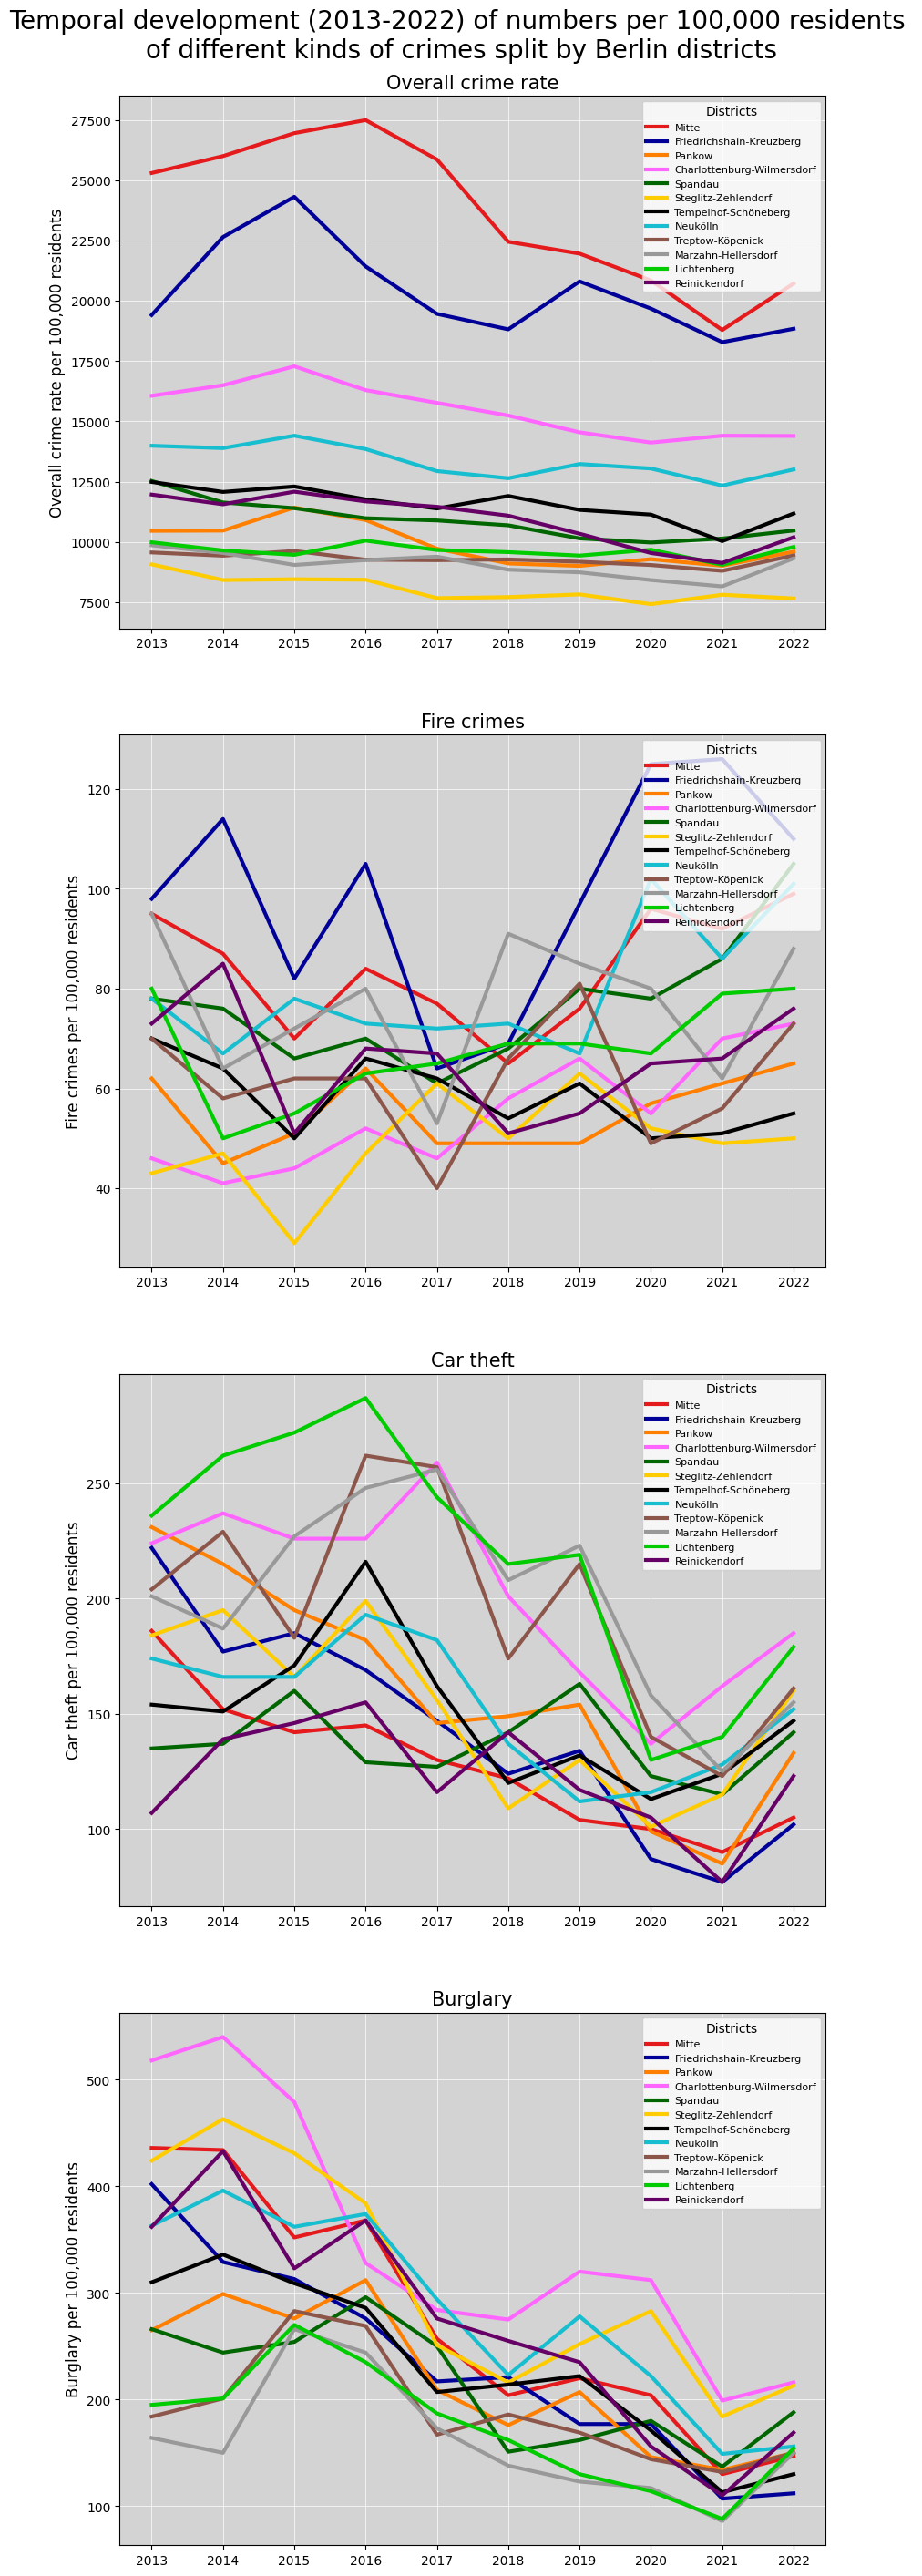

In [3]:
set1 = sns.color_palette("Set1")
tab10 = sns.color_palette("tab10")
qualitative_palette = sns.color_palette([set1[0], "#000099", set1[4], "#ff66ff", "#006600", "#ffcc00", "#000000", tab10[9], tab10[5], set1[8], "#00cc00", "#660066"])

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings

warnings.filterwarnings("ignore")

bezirkskriminalitaet = pd.read_pickle("../data/08_kriminalitaet_auf_bezirksebene_2013_bis_2022.pkl")
bezirkskriminalitaet['BEZ'] = bezirkskriminalitaet['LOR-Schlüssel (Bezirksregion)'].astype(str).str[:2]

bezirkskriminalitaet = bezirkskriminalitaet.rename(columns={"Straftaten \n-insgesamt-": "Overall crime rate",
                                                            "Branddelikte \n-insgesamt-": "Fire crimes",
                                                            "Diebstahl von Kraftwagen": "Car theft",
                                                            "Wohnraum-\neinbruch": "Burglary"})

# Create a list of features to iterate over
features_list = ["Overall crime rate", "Fire crimes", "Car theft", "Burglary"]

# Create the categorical color palette with unique colors for each category
categories = bezirkskriminalitaet["Bezeichnung (Bezirksregion)"].unique()
num_categories = len(categories)

# Create the subplots (4 rows, 1 column)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 32), sharex=True, gridspec_kw={'top': 0.95})

# Iterate over the features and plot each on its respective subplot
for idx, feature in enumerate(features_list):
    # Convert the current feature column to integers
    bezirkskriminalitaet[feature] = bezirkskriminalitaet[feature].astype(int)
    
    # Group the data by "Bezeichnung (Bezirksregion)" and "Year" and sum the values for the current feature
    grouped_data = bezirkskriminalitaet.groupby(["Bezeichnung (Bezirksregion)", "Year"])[feature].sum().reset_index()

    # Select the current subplot
    ax = axes[idx]
    
    # Iterate over the unique values in the "Bezeichnung (Bezirksregion)" column
    for category, color in zip(categories, qualitative_palette):
        # Filter the data for the current category
        category_data = grouped_data[grouped_data["Bezeichnung (Bezirksregion)"] == category]

        # Plot the line for the current category on the current subplot
        ax.plot(category_data["Year"], category_data[feature], label=category, color=color, linewidth=3)

    # Set the subplot title, labels, and legend
    ax.set_title(f"{feature}", fontsize=15)
    ax.set_ylabel(f"{feature} per 100,000 residents", fontsize=12)
    ax.legend(title="Districts", loc="upper right", fontsize=8)

    # Get all unique years in the data for the current subplot
    unique_years = bezirkskriminalitaet["Year"].unique()

    # Set the x-ticks to be all unique years for the current subplot
    ax.set_xticks(unique_years)

    ax.tick_params(axis='both', which='both', labelbottom=True)

    # Disable scientific notation on the y-axis
    ax.ticklabel_format(style='plain')

    # Set the background color to gray
    ax.set_facecolor('lightgray')
    # Add a grid
    ax.grid(color='white', linestyle='-', linewidth=0.5)

plt.suptitle('Temporal development (2013-2022) of numbers per 100,000 residents \nof different kinds of crimes split by Berlin districts', fontsize=20)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Fire crimes are shown in {numref}`fig:crimes-fire`, tough we cannot make out a clear pattern.
```{figure} plots/fire_crimes.svg
---
width: 100%
name: fig:crimes-fire
---
Number of fire crimes per 100,000 residents in the years 2013–2022 by district.
```
The numbers for each district display significant variations. For instance, Treptow-Köpenick had the third-highest number of fire crimes in 2019 but the lowest in 2020, indicating a weak or non-existent correlation between fire crimes and other indicators.

Looking at the car thefts in {numref}`fig:crimes-car`, we see significant fluctuations from year to year.

```{figure} plots/car_theft.svg
---
width: 100%
name: fig:crimes-car
---
Number of car thefts per 100,000 residents in the years 2013–2022 by district.
```
These fluctuations differ from the overall crime rate in {numref}`fig:crimes-overall`. Notably, Lichtenberg, Marzahn-Hellersdorf, Treptow-Köpenick, and Charlottenburg-Wilmersdorf have the highest car theft numbers, despite being among the lowest for overall crime (except for Charlottenburg-Wilmersdorf).  
A possible interpretation is that these districts are perceived as safer, with residents having higher incomes and possessing more valuable cars. This makes them attractive targets for car thieves.
Additionally, it is observed that the car theft rate is notably low for all districts during 2020 and 2021, the years with the heaviest Covid restrictions, increases again in 2022.

The number of burglaries is shown in {numref}`fig:crimes-burglary`. The numbers for all districts appear relatively similar, particularly since 2016.

```{figure} plots/burglary.svg
---
width: 100%
name: fig:crimes-burglary
---
Number of burglaries per 100,000 residents in the years 2013–2022 by district.
```
Notably, Steglitz-Zehlendorf, known for having the lowest overall crime rate, exhibited a relatively high burglary rate along with Charlottenburg-Wilmersdorf. The most remarkable aspect of this plot was the general declining trend in burglary numbers over the years.